<a href="https://colab.research.google.com/github/MarkNgendo/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_Close_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining the question

### a.) Specifying data analytic question





### b.) Defining metric for success

### c.)Understanding the context

### d.) Recording experimental design

### e.) Data Relevance

## Reading the data

### Importing relevant libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from yellowbrick.model_selection import validation_curve
%matplotlib inline

### Loading datasets

In [4]:
df = pd.read_csv('/content/Test (1).csv')

In [5]:
test = pd.read_csv('/content/Test (1).csv')

## Checking the data

### Previewing the top of our dataset

In [6]:
df.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [7]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,56.0,2.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,1664.0,1045.0,64.0,213.0,51.0,274.0,6046.0,3034.0,23453171.0,119.0,2305.0,1367.0,6252.0,151.0,565.0,603.0,4553.0,174.0,2900568.0,1898920.0,2268741.0,14056214.0,2338771.0,23465365.0,3.7,39.0,3.2,3.4,2.8,65.5,0.004407,1.0,711.0,2.0,1.0,1.0,1.0,1.0,7245,-0.555698,3.631052e+11
2,ID_325uzE,1,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,397.0,255.0,11.0,72.0,30.0,112.0,2404.0,304.0,3831278.0,12.0,346.0,73.0,604.0,39.0,103.0,668.0,1406.0,188.0,29147.0,411178.0,873284.0,2389256.0,129448.0,3832828.0,3.7,2.0,3.0,3.0,3.4,65.5,0.024035,1.0,715.0,2.0,1.0,1.0,NaN,NaN,2702,1.689370,1.771075e+11
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,96.0,217.0,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,49.0,33.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


### previewing the bottom of our dataset

In [8]:
df.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
6217,ID_zufSPk,1,8266.942912,8266.942912,8259.796103,310063715.0,1.491229e+11,618.0,438.0,15.0,202.0,42.0,164.0,996.0,262.0,3310472.0,19.0,217.0,135.0,715.0,2.0,25.0,273.0,671.0,25.0,987.0,187128.0,1174018.0,1933268.0,16157.0,3318645.0,3.7,3.0,2.4,2.3,3.9,61.5,0.007076,1.0,921.0,2.0,1.0,1.0,NaN,NaN,1494,-0.967973,2.262125e+11
6218,ID_zuz9yf,1,10869.612767,10873.493490,10865.827625,698936037.0,2.011601e+11,1608.0,911.0,84.0,204.0,45.0,123.0,5994.0,3808.0,30985192.0,219.0,3020.0,1416.0,7673.0,196.0,502.0,605.0,4484.0,207.0,14614866.0,1739950.0,2052440.0,12246575.0,343689.0,30999455.0,3.7,31.0,2.9,3.9,3.0,67.5,0.005486,1.0,807.0,2.0,1.0,1.0,NaN,6.0,7065,NaN,3.523272e+11
6219,ID_zvrMSX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,139.0,167.0,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
6221,ID_zyAFd7,1,7058.172796,7078.973345,7052.332304,473093253.0,1.275507e+11,954.0,672.0,20.0,110.0,65.0,2459.0,2708.0,291.0,10140687.0,15.0,399.0,121.0,838.0,97.0,243.0,502.0,1689.0,177.0,237801.0,1389120.0,1272925.0,6398945.0,843269.0,10143186.0,3.6,4.0,3.1,3.0,2.8,62.5,0.012064,1.0,858.0,2.0,1.0,1.0,NaN,NaN,3469,-3.289226,1.926557e+11


In [9]:
test.tail()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
6217,ID_zufSPk,1,8266.942912,8266.942912,8259.796103,310063715.0,1.491229e+11,618.0,438.0,15.0,202.0,42.0,164.0,996.0,262.0,3310472.0,19.0,217.0,135.0,715.0,2.0,25.0,273.0,671.0,25.0,987.0,187128.0,1174018.0,1933268.0,16157.0,3318645.0,3.7,3.0,2.4,2.3,3.9,61.5,0.007076,1.0,921.0,2.0,1.0,1.0,NaN,NaN,1494,-0.967973,2.262125e+11
6218,ID_zuz9yf,1,10869.612767,10873.493490,10865.827625,698936037.0,2.011601e+11,1608.0,911.0,84.0,204.0,45.0,123.0,5994.0,3808.0,30985192.0,219.0,3020.0,1416.0,7673.0,196.0,502.0,605.0,4484.0,207.0,14614866.0,1739950.0,2052440.0,12246575.0,343689.0,30999455.0,3.7,31.0,2.9,3.9,3.0,67.5,0.005486,1.0,807.0,2.0,1.0,1.0,NaN,6.0,7065,NaN,3.523272e+11
6219,ID_zvrMSX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,139.0,167.0,317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN
6220,ID_zy9Cfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
6221,ID_zyAFd7,1,7058.172796,7078.973345,7052.332304,473093253.0,1.275507e+11,954.0,672.0,20.0,110.0,65.0,2459.0,2708.0,291.0,10140687.0,15.0,399.0,121.0,838.0,97.0,243.0,502.0,1689.0,177.0,237801.0,1389120.0,1272925.0,6398945.0,843269.0,10143186.0,3.6,4.0,3.1,3.0,2.8,62.5,0.012064,1.0,858.0,2.0,1.0,1.0,NaN,NaN,3469,-3.289226,1.926557e+11


### Dataset information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6222 non-null   object 
 1   asset_id                 6222 non-null   int64  
 2   open                     4304 non-null   float64
 3   high                     4304 non-null   float64
 4   low                      4304 non-null   float64
 5   volume                   4302 non-null   float64
 6   market_cap               4191 non-null   float64
 7   url_shares               4285 non-null   float64
 8   unique_url_shares        4285 non-null   float64
 9   reddit_posts             6122 non-null   float64
 10  reddit_posts_score       6122 non-null   float64
 11  reddit_comments          6109 non-null   float64
 12  reddit_comments_score    6109 non-null   float64
 13  tweets                   4289 non-null   float64
 14  tweet_spam              

### Dataset shape

In [12]:
df.shape

(6222, 48)

In [13]:
test.shape

(6222, 48)

## External Data Source Validation

## Tidying the dataset

### Consistency

In [14]:
df.duplicated().sum()

0

In [15]:
test.duplicated().sum()

0

### Completeness

In [16]:
df.isnull().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

In [17]:
test.isnull().sum()

id                            0
asset_id                      0
open                       1918
high                       1918
low                        1918
volume                     1920
market_cap                 2031
url_shares                 1937
unique_url_shares          1937
reddit_posts                100
reddit_posts_score          100
reddit_comments             113
reddit_comments_score       113
tweets                     1933
tweet_spam                 1933
tweet_followers            1935
tweet_quotes               1935
tweet_retweets             1935
tweet_replies              1935
tweet_favorites            1935
tweet_sentiment1           1933
tweet_sentiment2           1933
tweet_sentiment3           1933
tweet_sentiment4           1933
tweet_sentiment5           1933
tweet_sentiment_impact1    1933
tweet_sentiment_impact2    1933
tweet_sentiment_impact3    1933
tweet_sentiment_impact4    1933
tweet_sentiment_impact5    1933
social_score               1933
average_

It is important to note that we have columns that have more importance than others and some of these include open and market cap. Therefore, we will first drop any rows where these two entries are null. There is need to reexamine the dataset after that.

In [18]:
df.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

In [19]:
# checking for remaining null values

df.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    3
unique_url_shares             3
reddit_posts                  5
reddit_posts_score            5
reddit_comments               4
reddit_comments_score         4
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

In [20]:
# for the test data, we have to subject it to the same procedures

test.dropna(axis=0,
          subset = ['open', 'market_cap', 'market_cap_global', 'volatility', 'percent_change_24h', 'volume'],
          inplace = True)

# checking remaining null values

test.isnull().sum()

id                            0
asset_id                      0
open                          0
high                          0
low                           0
volume                        0
market_cap                    0
url_shares                    3
unique_url_shares             3
reddit_posts                  5
reddit_posts_score            5
reddit_comments               4
reddit_comments_score         4
tweets                        0
tweet_spam                    0
tweet_followers               0
tweet_quotes                  0
tweet_retweets                0
tweet_replies                 0
tweet_favorites               0
tweet_sentiment1              0
tweet_sentiment2              0
tweet_sentiment3              0
tweet_sentiment4              0
tweet_sentiment5              0
tweet_sentiment_impact1       0
tweet_sentiment_impact2       0
tweet_sentiment_impact3       0
tweet_sentiment_impact4       0
tweet_sentiment_impact5       0
social_score                  0
average_

The remaining null values have no bearing if they are imputed with zeros. For example, reddit posts null values indicate no posts were shared on Reddit during that time.

Before that, there are several columns that have been either compiled into a single one(the social media columns) or have barely any usefulness upon performing extensive data walkthrough.

### Accuracy

In [21]:
# list of relevant columns to keep

useful = ['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
          'average_sentiment', 'news', 'price_score', 'social_impact_score',
          'correlation_rank', 'volatility', 'medium', 'youtube', 'market_cap_global',
          'percent_change_24h', 'close']

# appending relevant columns to an empty list
drop = []
for x in list(df.columns):
  if x not in useful:
    drop.append(x)

df.drop(labels= drop,
        axis = 1,
        inplace = True)

df.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,volatility,medium,youtube,percent_change_24h,market_cap_global
1,ID_325SNW,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,23465365.0,3.7,39.0,3.2,3.4,2.8,0.004407,1.0,1.0,-0.555698,3.631052e+11
2,ID_325uzE,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,3832828.0,3.7,2.0,3.0,3.0,3.4,0.024035,NaN,NaN,1.689370,1.771075e+11
5,ID_329H37,12309.911239,12317.022586,12286.508943,1.045155e+09,2.270841e+11,35113830.0,3.7,67.0,3.1,3.8,5.0,0.013678,NaN,5.0,3.920331,3.916727e+11
6,ID_32DnK8,9301.916435,9301.916435,9293.747775,6.607626e+08,1.705124e+11,23962084.0,3.6,29.0,2.8,4.0,3.2,0.009051,1.0,1.0,-0.510029,2.665700e+11
8,ID_32H6TE,9269.535206,9278.101979,9241.140352,5.767781e+08,1.690120e+11,9392039.0,3.7,14.0,3.2,4.3,3.8,0.018312,NaN,NaN,2.604443,2.523184e+11


In [22]:
# checking for null values in remaining columns

df.isnull().sum()

id                        0
open                      0
high                      0
low                       0
volume                    0
market_cap                0
social_score              0
average_sentiment         0
news                     47
price_score               0
social_impact_score       0
correlation_rank          0
volatility                0
medium                 2665
youtube                1870
percent_change_24h        0
market_cap_global         0
dtype: int64

In [23]:
# Imputing remaining null values with zeros
df.fillna(value = 0,
          inplace = True)

In [24]:
drop = []
for x in list(test.columns):
  if x not in useful:
    drop.append(x)


# dropping irrelevant columns in test set

test.drop(labels = drop,
          axis = 1,
          inplace = True)

test.head()

,id,open,high,low,volume,market_cap,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,volatility,medium,youtube,percent_change_24h,market_cap_global
1,ID_325SNW,11335.062188,11351.690956,11335.062188,1.064152e+09,2.101463e+11,23465365.0,3.7,39.0,3.2,3.4,2.8,0.004407,1.0,1.0,-0.555698,3.631052e+11
2,ID_325uzE,6322.560756,6328.362354,6294.714484,1.516268e+09,1.153862e+11,3832828.0,3.7,2.0,3.0,3.0,3.4,0.024035,NaN,NaN,1.689370,1.771075e+11
5,ID_329H37,12309.911239,12317.022586,12286.508943,1.045155e+09,2.270841e+11,35113830.0,3.7,67.0,3.1,3.8,5.0,0.013678,NaN,5.0,3.920331,3.916727e+11
6,ID_32DnK8,9301.916435,9301.916435,9293.747775,6.607626e+08,1.705124e+11,23962084.0,3.6,29.0,2.8,4.0,3.2,0.009051,1.0,1.0,-0.510029,2.665700e+11
8,ID_32H6TE,9269.535206,9278.101979,9241.140352,5.767781e+08,1.690120e+11,9392039.0,3.7,14.0,3.2,4.3,3.8,0.018312,NaN,NaN,2.604443,2.523184e+11


In [25]:
test.isnull().sum()

id                        0
open                      0
high                      0
low                       0
volume                    0
market_cap                0
social_score              0
average_sentiment         0
news                     47
price_score               0
social_impact_score       0
correlation_rank          0
volatility                0
medium                 2665
youtube                1870
percent_change_24h        0
market_cap_global         0
dtype: int64

In [26]:
# Imputing the null values with zeros

test.fillna(value = 0, inplace = True)

In [27]:
df.columns

Index(['id', 'open', 'high', 'low', 'volume', 'market_cap', 'social_score',
       'average_sentiment', 'news', 'price_score', 'social_impact_score',
       'correlation_rank', 'volatility', 'medium', 'youtube',
       'percent_change_24h', 'market_cap_global'],
      dtype='object')

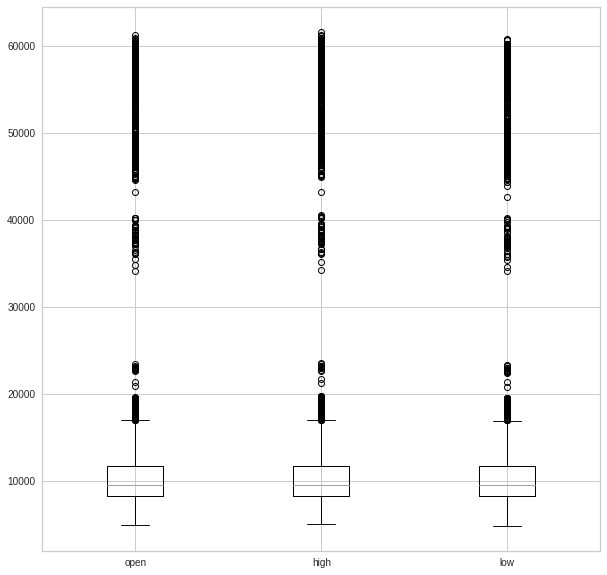

In [28]:
plt.figure(figsize=(10,10))
df.boxplot(column=['open', 'high', 'low'])
plt.show()

## Exploratory Analysis

## Implementing the solution

## Challenging the solution

## Follow up questions